In [1]:
import sys
import numpy as np
import cv2
from PIL import Image

In [2]:
src = cv2.imread('./openCV/grabcut/물고기 예제/물고기.jpg')

if src is None:
    print('image load failed')
    sys.exit()

In [3]:
#사각형 선택
rc = cv2.selectROI(src)

In [4]:
#선택되지 않은 부분 블랙 처리
mask = np.zeros(src.shape[:2], np.uint8)

In [5]:
cv2.grabCut(src, mask, rc, None, None, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[3.84041681e-01, 2.10818325e-01, 8.45960770e-02, 2.22861224e-01,
         9.76826929e-02, 3.73818782e+01, 3.76207515e+01, 2.57017000e+01,
         6.62281774e+01, 8.65594797e+01, 5.52713716e+01, 4.53761738e+01,
         9.50452048e+01, 1.16231668e+02, 4.67970080e+01, 5.52097419e+01,
         3.56579322e+01, 4.34537786e+01, 7.14455163e+01, 7.01953541e+01,
         2.03024608e+01, 2.17963644e+01, 1.50959575e+01, 2.17963644e+01,
         2.61283387e+01, 1.59443384e+01, 1.50959575e+01, 1.59443384e+01,
         2.71323957e+01, 8.45971103e+01, 1.18145575e+02, 7.10632520e+01,
         1.18145575e+02, 1.91251092e+02, 1.18490614e+02, 7.10632520e+01,
         1.18490614e+02, 9.19175182e+01, 1.60277524e+02, 1.62907521e+02,
         1.83255660e+02, 1.62907521e+02, 1.9

In [6]:
# 0 : cv2.GC_BGD, 2: cv2.GC_PR_RGD
mask_fg = np.where( (mask == 0) | (mask == 2), 0, 1).astype('uint8')
mask_bg = np.where( (mask == 1) | (mask == 3), 0, 1).astype('uint8')

In [7]:
dst_fg = src * mask_fg[:, :, np.newaxis]
dst_bg = src * mask_bg[:, :, np.newaxis]

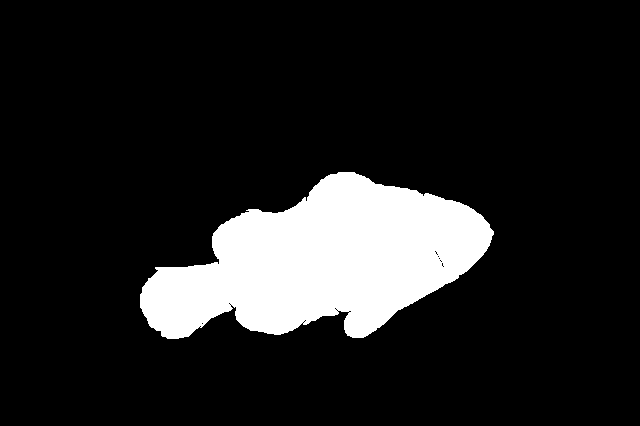

In [8]:
Image.fromarray(mask_fg*255)

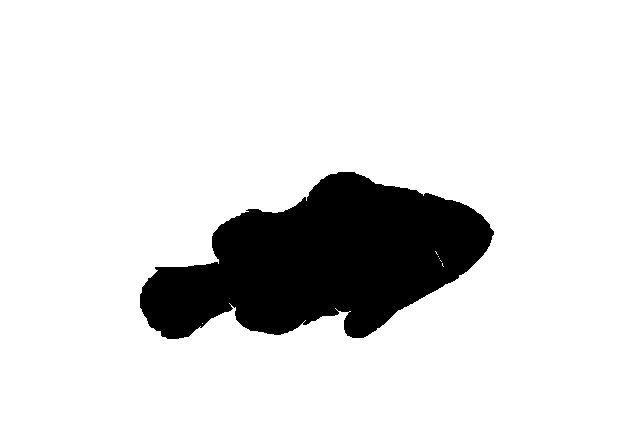

In [9]:
Image.fromarray(mask_bg*255)

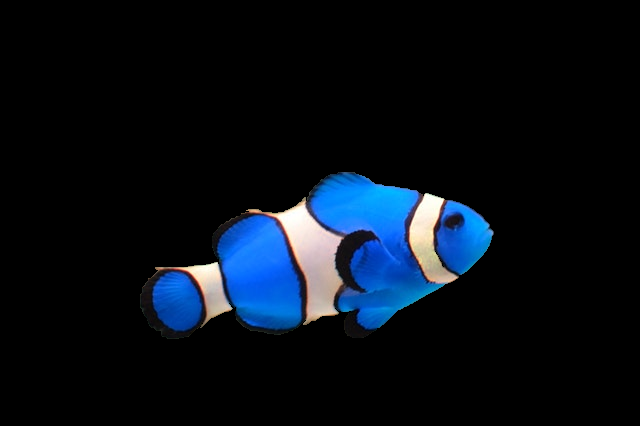

In [10]:
Image.fromarray(dst_fg)

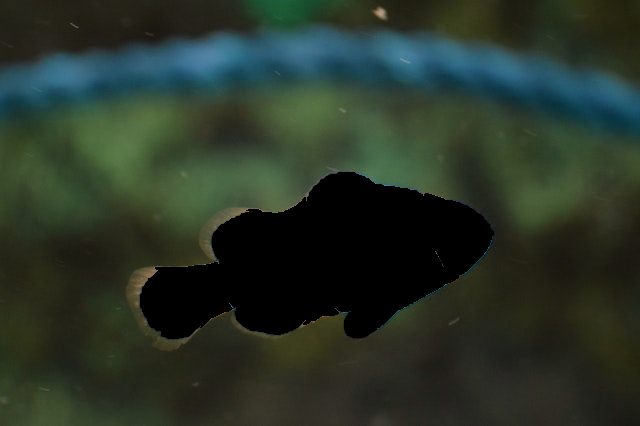

In [11]:
Image.fromarray(dst_bg)